# 5. Recursion

### Recursion

- 5.1. Objectives
- 5.2. What Is Recursion?
- 5.3. Calculating the Sum of a List of Numbers
- 5.4. The Three Laws of Recursion
- 5.5. Converting an Integer to a String in Any Base
- 5.6. Stack Frames: Implementing Recursion
- 5.7. Introduction: Visualizing Recursion
- 5.8. Sierpinski Triangle
- 5.9. Complex Recursive Problems
- 5.10. Tower of Hanoi
- 5.11. Exploring a Maze
- 5.12. Dynamic Programming
- 5.13. Summary
- 5.14. Key Terms
- 5.15. Discussion Questions
- 5.16. Glossary
- 5.17. Programming Exercises

# 5.1. Objectives
The goals for this chapter are as follows:

- To understand that complex problems that may otherwise be difficult to solve may have a simple recursive solution.
- To learn how to formulate programs recursively.
- To understand and apply the three laws of recursion.
- To understand recursion as a form of iteration.
- To implement the recursive formulation of a problem.
- To understand how recursion is implemented by a computer system.

# 5.2. What Is Recursion?

Recursion is a method of solving problems that involves breaking a problem down into smaller and smaller subproblems until you get to a small enough problem that it can be solved trivially. Usually recursion involves a function calling itself. While it may not seem like much on the surface, recursion allows us to write elegant solutions to problems that may otherwise be very difficult to program.

# 5.3. Calculating the Sum of a List of Numbers

We will begin our investigation with a simple problem that you already know how to solve without using recursion. Suppose that you want to calculate the sum of a list of numbers such as: [1,3,5,7,9]. An iterative function that computes the sum is shown in ActiveCode 1. The function uses an accumulator variable (the_sum) to compute a running total of all the numbers in the list by starting with 0 and adding each number in the list.

In [1]:
def list_sum(num_list):
    the_sum = 0
    for i in num_list:
        the_sum = the_sum + i
    return the_sum

print(list_sum([1, 3, 5, 7, 9]))

25


Pretend for a minute that you do not have while loops or for loops. How would you compute the sum of a list of numbers? If you were a mathematician you might start by recalling that addition is a function that is defined for two parameters, a pair of numbers. To redefine the problem from adding a list to adding pairs of numbers, we could rewrite the list as a fully parenthesized expression. Such an expression looks like this:

((((1+3)+5)+7)+9)

We can also parenthesize the expression the other way around,

(1+(3+(5+(7+9))))

Notice that the innermost set of parentheses, (7+9), is a problem that we can solve without a loop or any special constructs. In fact, we can use the following sequence of simplifications to compute a final sum.

total= (1+(3+(5+(7+9))))

total= (1+(3+(5+16)))

total= (1+(3+21))

total= (1+24)

total= 25

How can we take this idea and turn it into a Python program? First, let’s restate the sum problem in terms of Python lists. We might say the the sum of the list num_list is the sum of the first element of the list (num_list[0]), and the sum of the numbers in the rest of the list (num_list[1:]). To state it in a functional form:

```list_sum(num_list)= first(num_list) + list_sum(rest(num_list)) ```

In this equation first(num_list) returns the first element of the list and rest(num_list) returns a list of everything but the first element. This is easily expressed in Python as shown in ActiveCode 2.

In [2]:
def list_sum(num_list):
   if len(num_list) == 1:
        return num_list[0]
   else:
        return num_list[0] + list_sum(num_list[1:])

print(list_sum([1, 3, 5, 7, 9]))

25


There are a few key ideas in this listing to look at. First, on line 2 we are checking to see if the list is one element long. This check is crucial and is our escape clause from the function. The sum of a list of length 1 is trivial; it is just the number in the list. Second, on line 5 our function calls itself! This is the reason that we call the list_sum algorithm recursive. A recursive function is a function that calls itself.

Figure 1 shows the series of recursive calls that are needed to sum the list [1,3,5,7,9]. You should think of this series of calls as a series of simplifications. Each time we make a recursive call we are solving a smaller problem, until we reach the point where the problem cannot get any smaller.

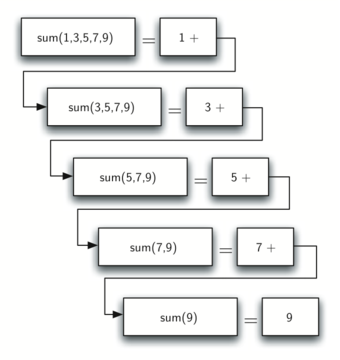

Figure 1: Series of Recursive Calls Adding a List of Numbers


When we reach the point where the problem is as simple as it can get, we begin to piece together the solutions of each of the small problems until the initial problem is solved. Figure 2 shows the additions that are performed as list_sum works its way backward through the series of calls. When list_sum returns from the topmost problem, we have the solution to the whole problem.

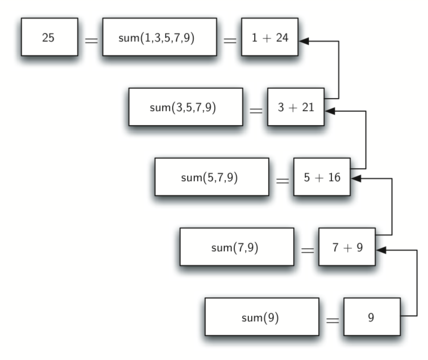

Figure2: Series of Recursive Returns from Adding a List of Numbers

# 5.4. The Three Laws of Recursion

Like the robots of Asimov, all recursive algorithms must obey three important laws:

- 1.- A recursive algorithm must have a base case.
- 2.- A recursive algorithm must change its state and move toward the base case.
- 3.- A recursive algorithm must call itself, recursively.

Let’s look at each one of these laws in more detail and see how it was used in the list_sum algorithm. First, a base case is the condition that allows the algorithm to stop recursing. A base case is typically a problem that is small enough to solve directly. In the list_sum algorithm the base case is a list of length 1.

To obey the second law, we must arrange for a change of state that moves the algorithm toward the base case. A change of state means that some data that the algorithm is using is modified. Usually the data that represents our problem gets smaller in some way. In the list_sum algorithm our primary data structure is a list, so we must focus our state-changing efforts on the list. Since the base case is a list of length 1, a natural progression toward the base case is to shorten the list. This is exactly what happens on line 5 of ActiveCode 2 when we call list_sum with a shorter list.

The final law is that the algorithm must call itself. This is the very definition of recursion. Recursion is a confusing concept to many beginning programmers. As a novice programmer, you have learned that functions are good because you can take a large problem and break it up into smaller problems. The smaller problems can be solved by writing a function to solve each problem. When we talk about recursion it may seem that we are talking ourselves in circles. We have a problem to solve with a function, but that function solves the problem by calling itself! But the logic is not circular at all; the logic of recursion is an elegant expression of solving a problem by breaking it down into a smaller and easier problems.

In the remainder of this chapter we will look at more examples of recursion. In each case we will focus on designing a solution to a problem by using the three laws of recursion.

# 5.5. Converting an Integer to a String in Any Base

In [12]:
def to_str(n, base):
   convert_string = "0123456789ABCDEF"
   if n < base:
      return convert_string[n]
   else:
      return to_str(n // base, base) + convert_string[n % base]

print(to_str(10, 2))

1010


In [11]:
90 % 16

10

In [24]:
def reverse(string):
    if len(string) == 0:
        return string
    else:
        return reverse(string[1:]) + string[0]

In [25]:
print(reverse("hello"), "olleh")
print(reverse("l"), "l")
print(reverse("follow"), "wollof")
print(reverse(""), "")


olleh olleh
l l
wollof wollof
 


In [26]:
def is_palindrome(s):
    if len(s) < 1:
        return True
    else:
        if s[0] == s[-1]:
            return is_palindrome(s[1:-1])
        else:
            return False

In [59]:
is_palindrome("adam")        

False

In [64]:
def palindrome(s):
    return len(s) < 1 or s[0] == s[-1] and palindrome(s[1:-1])

In [67]:
palindrome('')

True